# 빅데이터 분석 특강 (5주차) 4월 4일 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis, TensorFlow, TensorFlow NumPy]

### imports 

In [516]:
#!conda install -c conda-forge python-graphviz -y

In [517]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [518]:
import tensorflow.experimental.numpy as tnp 

In [519]:
tnp.experimental_enable_numpy_behavior() 

### 최적화의 문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$ 

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음 

- 최적값을 만드는 함수를 만들자-> optimizer
- beta=2를 만드는 함수 찾자, loss가 0이 되는 함수 찾자
- 수식을 기억할 필요가 없다(장점)

### tf.keras.optimizers를 이용한 최적화방법 

#### 방법1:  `opt.apply_gradients([(slope,beta)])`를 이용

In [377]:
beta = tnp.linspace(-10,10,100)
loss= (beta/2-1)**2

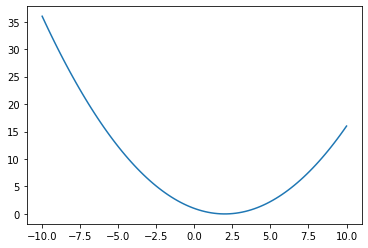

In [378]:
plt.plot(beta,loss)

학습률 설정

In [379]:
alpha = 0.01/6

In [380]:
beta = tf.Variable(-10.0)

이전에 했던 거

In [381]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta) # 생략 가능
    loss = (beta/2-1)**2
slope = tape.gradient(loss,beta)

그레디언트 룰 알고 있다는 전제가 필요.

```python
beta.assign_sub(slope * alpha)
beta
```
이거 안 하고 싶어
- slope와 beta를 opt에 입력해줘야 하겠지?

In [382]:
slope

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

In [383]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-10.0>

`-` iter1: `opt.apply_gradients()` 에 값을 전달하여 beta를 1회 업데이트

In [384]:
opt = tf.keras.optimizers.SGD(alpha)

학습률alpha이 0.01인 optimizer 만들어, SGD 확률적 경사 하강법

In [385]:
#collapse-output
opt.apply_gradients?

Signature:
opt.apply_gradients(
    grads_and_vars,
    name=None,
    experimental_aggregate_gradients=True,
)
Docstring:
Apply gradients to variables.

This is the second part of `minimize()`. It returns an `Operation` that
applies gradients.

The method sums gradients from all replicas in the presence of
`tf.distribute.Strategy` by default. You can aggregate gradients yourself by
passing `experimental_aggregate_gradients=False`.

Example:

```python
grads = tape.gradient(loss, vars)
grads = tf.distribute.get_replica_context().all_reduce('sum', grads)
# Processing aggregated gradients.
optimizer.apply_gradients(zip(grads, vars),
    experimental_aggregate_gradients=False)

```

Args:
  grads_and_vars: List of (gradient, variable) pairs.
  name: Optional name for the returned operation. Default to the name passed
    to the `Optimizer` constructor.
  experimental_aggregate_gradients: Whether to sum gradients from different
    replicas in the presence of `tf.distribute.Strategy`. If F

In [386]:
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

() `opt.apply_gradient`를 위한 소괄호 안에 [] `list`를 전달하기 위한 대괄호 안에 () `pair`를 입력하기 위한 소괄호 입력

- 주의점: `opt.apply_gradients()`의 입력으로 pair의 list를 전달해야함.

In [387]:
slope

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

In [388]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

beta가 -10에서 -9.9로 업데이트 된 모습

`-`iter2

In [47]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta) # 생략 가능
    loss = (beta/2-1)**2
slope = tape.gradient(loss,beta)
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

beta가 업데이트된 모습

`-` for문으로 반복 정리

In [58]:
alpha = 0.01/6
beta = tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [59]:
for epoc in range(10000):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(beta) # 생략 가능
        loss = (beta/2-1)**2
    slope = tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha)
    beta

In [60]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

2에 가까운 beta가 나온 모습을 볼 수 있었다.

In [540]:
#collapse
beta = tf.Variable(-10.0)
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
for epoc in range(10000):
    with tf.GradientTape() as tape:
        tape.watch(beta)
        loss = (beta/2-1)**2
    slope = tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)])
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

---

In [54]:
opt.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

In [57]:
id(opt.learning_rate)

139784512996208

위에는 알파값

In [55]:
opt.lr

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

In [56]:
id(opt.lr)

139784512996208

주소 같네, 같은 거네

---

#### 방법2: `opt.minimize(loss_fn,beta)`

- 이거 쓰면 gradient tape 안 써도 된다.
- gradient tape문법이 까다로울 수 있으니..

In [343]:
alpha = 0.01/6
beta = tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)
# optimizer를 만든다고 표현.

In [344]:
#collapse-output
opt.minimize?

Signature: opt.minimize(loss, var_list, grad_loss=None, name=None, tape=None)
Docstring:
Minimize `loss` by updating `var_list`.

This method simply computes gradient using `tf.GradientTape` and calls
`apply_gradients()`. If you want to process the gradient before applying
then call `tf.GradientTape` and `apply_gradients()` explicitly instead
of using this function.

Args:
  loss: `Tensor` or callable. If a callable, `loss` should take no arguments
    and return the value to minimize. If a `Tensor`, the `tape` argument
    must be passed.
  var_list: list or tuple of `Variable` objects to update to minimize
    `loss`, or a callable returning the list or tuple of `Variable` objects.
    Use callable when the variable list would otherwise be incomplete before
    `minimize` since the variables are created at the first time `loss` is
    called.
  grad_loss: (Optional). A `Tensor` holding the gradient computed for
    `loss`.
  name: (Optional) str. Name for the returned operation.
  ta

loss fuction써서 넘겨주기

```python
loss_fn = lambda: (y-X@beta).T @ (y-X@beta).T
#나중에 할 거
```

In [345]:
loss_fn = lambda: (beta/2-1)**2

lambda; 입력함수
- `lambda x: x**2` <=> `lambda(x) = x^2`
- `lambda x,y: x+y` <=> `lambda(x,y) = x+y`
- `lambda y` <=> `lambda()=y`, 입력이 없으며 출력은 항상 y인 함수

In [346]:
loss_fn() # 입력은 없고 출력은 뭔가 계산되는 함수

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

$\beta$에 $-10$ 넣어줬으니까 $loss$ 계산 되어서 $(\frac{1}{2}\beta-1)^2 =36$ 나온 거

`-` iter1

In [347]:
opt.minimize(loss_fn,beta)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

loss_fn과 beta를 전달하자

In [348]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

업데이트된 beta

`-` iter2

In [70]:
opt.minimize(loss_fn,beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

업데이트된 beta

In [71]:
alpha = 0.01/6
beta = tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)
loss_fn = lambda: (beta/2-1)**2
for epoc in range(10000):
    opt.minimize(loss_fn,beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

2에 근접하게 나오는 beta

왜 하느냐!
- 결국 회귀분석을 위해
- loss_fn를 minimize하는 beta찾는 게 회귀식에서 기울기와 상수를 찾는 것과 같음

In [529]:
#collapse
beta=tf.Variable(-10.0)
alpha=0.1/6
opt = tf.keras.optimizers.SGD(alpha)
loss_fn = lambda: (beta/2-1)**2
for epoc in range(10000):
    opt.minimize(loss_fn,beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9999928>

### 회귀분석 문제

`-` ${\bf y} \approx 2.5 + 4.0 {\bf x}$

초기값 잘 설정되면 수렴이 잘 돼..

In [544]:
tnp.random.seed(43052)
N = 200
x = tnp.linspace(0,1,N) 
epsilon = tnp.random.randn(N)*0.5
y = 2.5+4*x + epsilon
y_true = 2.5+4*x

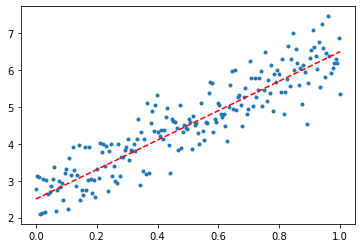

In [545]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'r--')

### 이론적 풀이

교수님께서 찾아서 목록화해놓은 방법들....정말 많은 방법들이 있는데 그 중 일부...

#### 풀이1: 스칼라버전

`-` 포인트 
- $S_{xx}=16.834170854271363$, $S_{xy}=66.20937503043275$
- $\hat{\beta}_0=2.583667211565867$, $\hat{\beta}_1=3.933034516733168$

In [400]:
Sxx = sum((x - x.mean())**2)
Sxy = sum((x - x.mean())*(y-y.mean()))
Sxx,Sxy

(<tf.Tensor: shape=(), dtype=float64, numpy=16.834170854271363>,
 <tf.Tensor: shape=(), dtype=float64, numpy=66.20937503043275>)

In [402]:
beta1_hat = Sxy/Sxx # true값이 4니까 가깝네~
beta1_hat

<tf.Tensor: shape=(), dtype=float64, numpy=3.933034516733168>

In [404]:
beta0_hat = y.mean() - x.mean()*beta1_hat # true값이 2.5니까 가깝네~
beta0_hat

<tf.Tensor: shape=(), dtype=float64, numpy=2.583667211565867>

In [547]:
# collapse
beta1_hat = sum((x-x.mean())*(y-y.mean())) / sum((x-x.mean())**2)
beta0_hat = y.mean() - x.mean()*beta1_hat
beta0_hat, beta1_hat

(<tf.Tensor: shape=(), dtype=float64, numpy=2.583667211565867>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.933034516733168>)

#### 풀이2: 벡터버전

`-` 포인트
- $\hat{\beta}=(X'X)^{-1}X'y$

- $\hat{\beta}_0=2.58366721$, $\hat{\beta}_1=3.93303452$

In [407]:
y = y.reshape(N,1)
X = tf.stack([tf.ones(N,dtype=tf.float64),x],axis=1)
y.shape, X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [411]:
tf.linalg.inv(X.T @ X) @ X.T @ y # 위에서 scalar로 구한 값과 같은 값이 나오는 모습.

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

In [555]:
# collaspse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
tf.linalg.inv(X.T @ X) @ X.T @ y 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

#### 풀이3: 벡터버전, 손실함수의 도함수이용 

`-` 포인트
- $loss'(\beta)=-2X'y +2X'X\beta$
- $\beta_{new} = \beta_{old} - \alpha \times loss'(\beta_{old})$

In [417]:
y = y.reshape(N,1)
X = tf.stack([tf.ones(N,dtype=tf.float64),x],axis=1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [418]:
beta_hat = tnp.array([-5,10]).reshape(2,1) # 지금 beta_hat은 아니지만.. beta_hat이 될 것이기 때문에 이름 이렇게 지정..
beta_hat

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[-5],
       [10]])>

미분해서 slope구하고 alpha * slope를 beta에서 뺴기_위의 식 그대로 풀어쓴 거..
- 만약 slope 안 쓴다면?

SSE

In [419]:
slope = -2 * X.T @ y +2 * X.T @ X @ beta_hat
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1820.07378797],
       [ -705.77222696]])>

alpha가 1820씩 움직일 것. 너무 크니 적당히 잡아야겠다 다짐..

In [420]:
alpha = 0.001

In [421]:
step = slope * alpha
step

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1.82007379],
       [-0.70577223]])>

In [422]:
for epoc in range(1000):
    slope = -2 * X.T @ y +2 * X.T @ X @ beta_hat
    beta_hat = beta_hat -alpha * slope

In [423]:
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

위에랑 같은 모습

In [426]:
y = y.reshape(N,1)
X = tf.stack([tf.ones(N,dtype=tf.float64),x],axis=1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [427]:
beta_hat = tnp.array([-5,10]).reshape(2,1)
beta_hat

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[-5],
       [10]])>

MSE

In [428]:
slope = (-2 * X.T @ y +2 * X.T @ X @ beta_hat)/N # 위에서 1820 나왔잖아.. 나눠줘도 loss찾는데 문제 없으니까 뭐
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-9.10036894],
       [-3.52886113]])>

In [429]:
alpha = 0.1

In [430]:
step = slope * alpha
step

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-0.91003689],
       [-0.35288611]])>

In [431]:
for epoc in range(1000):
    slope = (-2 * X.T @ y +2 * X.T @ X @ beta_hat)/N
    beta_hat = beta_hat -alpha * slope

In [432]:
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

MSE로 loss값을 구해주면 같이 최소점을 찾을 수 있으나 alpha를 더 크게 적당히 움직이면서 가능..!

In [575]:
#collapse
y=y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha=0.1
for epoc in range(1000):
    slope = ( -2 * X.T @ y + 2 * X.T @ X @ beta_hat) /  N
    beta_hat = beta_hat - alpha * slope
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

### GradientTape를 이용 

#### 풀이1: 벡터버전

`-` 포인트
```python
## 포인트코드1: 그레디언트 테입  
with tf.GradientTape() as tape: 
    loss = 
## 포인트코드2: 미분 
slope = tape.gradient(loss,beta_hat) 
## 포인트코드3: update 
beta_hat.assign_sub(slope*alph) 
```

In [146]:
y = y.reshape(N,1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [147]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [148]:
alpha=0.1

In [149]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = X@beta_hat
        loss = (y-yhat).T @(y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    beta_hat.assign_sub(alpha*slope)

In [150]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

위에랑 같은 모습.
- slope값이 무한대로 가는 것을 막기 위해 N으로 나눠줬다.

In [583]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha=0.1
for epoc in range(1000):
    with tf.GradientTape() as tape:
        tape.watch(beta_hat)
        yhat = X@beta_hat
        loss = ((y-yhat).T @ (y-yhat) )/N
    slope = tape.gradient(loss,beta_hat)
    beta_hat.assign_sub(slope*alpha)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전

`-` 포인트
```python
## 포인트코드: 미분
slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
```

In [156]:
y = y.reshape(-1)
x.shape , y.shape

(TensorShape([200]), TensorShape([200]))

In [162]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [167]:
alpha=0.1

In [163]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = beta0_hat + x*beta1_hat
        loss = sum((y-yhat)**2) / N
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
    beta0_hat.assign_sub(alpha*slope0)
    beta1_hat.assign_sub(alpha*slope1)

In [166]:
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

1분정도..? 잘못됐지! 오래걸렸잖아

In [168]:
y = y.reshape(-1)
x.shape , y.shape

(TensorShape([200]), TensorShape([200]))

In [169]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [170]:
alpha=0.1

In [171]:
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = beta0_hat + x*beta1_hat
        loss = tf.reduce_sum((y-yhat)**2) / N
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
    beta0_hat.assign_sub(alpha*slope0)
    beta1_hat.assign_sub(alpha*slope1)

In [172]:
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

tf.reduce_sum을 쓰니 빨라진 모습
- 애매한 부분을 넘어가버림...그래서 빨라짐... 
- *바뀌는 과정에서 최적화가 덜 되었다고 표현*

In [589]:
#collapse
y = y.reshape(-1)
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)
alpha = 0.1
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = beta0_hat + x*beta1_hat
        loss = ( tf.reduce_sum((y-yhat)**2) ) / N
    slope0, slope1 = tape.gradient(loss, [beta0_hat, beta1_hat])
    beta0_hat.assign_sub(alpha*slope0)
    beta1_hat.assign_sub(alpha*slope1)
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

### GradientTape + opt.apply_gradients

#### 풀이1: 벡터버전 

`-` 포인트 
```python
## 포인트코드: 업데이트
opt.apply_gradients([(slope,beta_hat)])  ## pair의 list가 입력 
```

In [449]:
y = y.reshape(N,1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [450]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

---

In [177]:
tf.keras.optimizers

<module 'keras.api._v2.keras.optimizers' from '/home/csy/anaconda3/envs/stbda2022/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>

In [178]:
tf.optimizers

<module 'keras.api._v2.keras.optimizers' from '/home/csy/anaconda3/envs/stbda2022/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>

경로가 같다 = 똑같은 위치에 있는 모듈 = 같은 것

---

In [175]:
alpha=0.1

In [180]:
opt = tf.optimizers.SGD(alpha)

In [181]:
#collapse-output
opt.apply_gradients?

Signature:
opt.apply_gradients(
    grads_and_vars,
    name=None,
    experimental_aggregate_gradients=True,
)
Docstring:
Apply gradients to variables.

This is the second part of `minimize()`. It returns an `Operation` that
applies gradients.

The method sums gradients from all replicas in the presence of
`tf.distribute.Strategy` by default. You can aggregate gradients yourself by
passing `experimental_aggregate_gradients=False`.

Example:

```python
grads = tape.gradient(loss, vars)
grads = tf.distribute.get_replica_context().all_reduce('sum', grads)
# Processing aggregated gradients.
optimizer.apply_gradients(zip(grads, vars),
    experimental_aggregate_gradients=False)

```

Args:
  grads_and_vars: List of (gradient, variable) pairs.
  name: Optional name for the returned operation. Default to the name passed
    to the `Optimizer` constructor.
  experimental_aggregate_gradients: Whether to sum gradients from different
    replicas in the presence of `tf.distribute.Strategy`. If F

In [182]:
for epoc in range(1000): 
    with tf.GradientTape() as tape: 
        yhat = X@beta_hat
        loss = (y-yhat).T @ (y-yhat) / N 
    slope = tape.gradient(loss,beta_hat)  
    opt.apply_gradients( [(slope,beta_hat)] )

In [183]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

In [594]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha=0.1
opt = tf.keras.optimizers.SGD(alpha)
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = X@beta_hat
        loss =( (y-yhat).T@(y-yhat) )/200
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전 

`-` 포인트
```python
## 포인트코드: 업데이트 
opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)]) ## pair의 list가 입력 
```

In [220]:
y = y.reshape(-1)
x.shape , y.shape

(TensorShape([200]), TensorShape([200]))

In [221]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [222]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [223]:
for epoc in range(1000): 
    with tf.GradientTape() as tape: 
        yhat = beta0_hat + beta1_hat*x
        loss = tf.reduce_sum((y-yhat)**2) / N
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])  
    opt.apply_gradients( [(slope0,beta0_hat),(slope1,beta1_hat)] )

여러개를 가지고 미분하고 싶을때, 두 개 pair의 리스트로 전달해야함..

In [224]:
beta0_hat,beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

In [597]:
#collapse
y=y.reshape(-1)
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)
alpha=0.1
opt = tf.keras.optimizers.SGD(alpha)
for epoc in range(1000):
    with tf.GradientTape() as tape:
        yhat = beta0_hat + beta1_hat*x
        loss = ( tf.reduce_sum((y-yhat)**2) ) / 200
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
    opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)])
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

### opt.minimize

#### 풀이1: 벡터버전, 사용자정의 손실함수 with lambda

In [201]:
y = y.reshape(N,1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [202]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [206]:
loss_fn = lambda: (y-X@beta_hat).T @ (y-X@beta_hat) / N

In [210]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [211]:
for epoc in range(1000):
    opt.minimize(loss_fn, beta_hat)

In [212]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

In [601]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha = 0.1
opt = tf.optimizers.SGD(alpha)
loss_fn = lambda: ((y-X@beta_hat).T @ (y-X@beta_hat) )/200
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전, 사용자정의 손실함수 with lambda

`-` 포인트
```python
## 포인트코드: 미분 & 업데이트 = minimize 
opt.minimize(loss_fn,[beta0_hat,beta1_hat])
```

In [214]:
y = y.reshape(-1)
x.shape , y.shape

(TensorShape([200]), TensorShape([200]))

In [215]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [216]:
loss_fn = lambda: tf.reduce_sum((y-beta0_hat-beta1_hat*x) **2) / N

In [217]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [218]:
for epoc in range(1000):
    opt.minimize(loss_fn, [beta0_hat,beta1_hat])

In [219]:
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

In [603]:
#collapse
y = y.reshape(-1)
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)
alpha = 0.1
opt = tf.keras.optimizers.SGD(alpha)
loss_fn = lambda: tf.reduce_sum((y-beta0_hat-beta1_hat*x)**2) / 200
for epoc in range(1000):
    opt.minimize(loss_fn, [beta0_hat, beta1_hat])
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

#### 풀이3: 벡터버전, 사용자정의 (짧은) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    return ??
```

In [225]:
y = y.reshape(N,1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [226]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

거즘 더미함수라 생각

In [227]:
def loss_fn():
    return (y-X@beta_hat).T @ (y-X@beta_hat) / N

In [228]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [229]:
for epoc in range(1000):
    opt.minimize(loss_fn, beta_hat)

In [230]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

같은 결과

In [606]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha = 0.1
opt = tf.keras.optimizers.SGD(alpha)
def loss_fn():
    return ( (y-X@beta_hat).T @ (y-X@beta_hat) ) /200
for oepoc in range(1000):
        opt.minimize(loss_fn,beta_hat)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이4: 벡터버전, 사용자정의 (긴) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    ??
    ??
    return ??
```

In [231]:
y = y.reshape(N,1)
X.shape , y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [232]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [234]:
def loss_fn():
    yhat = X@beta_hat # 컴퓨터한테 전달할 수식 1
    loss = (y-yhat).T @ (y-yhat) / N # 컴퓨터한테 전달할 수식 2
    return loss # tape.gradient(loss,beta_hat) 에서의 미분 당하는 애

gradient tape을 대체해버린 minimize ..원래 그러면 안 되지..
- 그 흔적들이 있음
- tensorflow gradient역할을 loss_fn이 대신한다.

In [235]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [236]:
for epoc in range(1000):
    opt.minimize(loss_fn, beta_hat)

In [237]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

In [609]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
alpha = 0.1
opt = tf.keras.optimizers.SGD(alpha)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
def loss_fn():
    yhat = X@beta_hat
    return ((y-yhat).T@(y-yhat))/200
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이5: 벡터버전, 사용자정의 손실함수 <- tf.losses.MSE 

`-` 포인트
```python
## 포인트코드: 미리구현되어있는 손실함수 이용 
tf.losses.MSE(y,yhat)
```

In [238]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [239]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [240]:
alpha=0.1

In [241]:
opt = tf.optimizers.SGD(alpha) 

In [242]:
#collapse-output
tf.keras.losses.MSE?

Signature: tf.keras.losses.MSE(y_true, y_pred)
Docstring:
Computes the mean squared error between labels and predictions.

After computing the squared distance between the inputs, the mean value over
the last dimension is returned.

`loss = mean(square(y_true - y_pred), axis=-1)`

Standalone usage:

>>> y_true = np.random.randint(0, 2, size=(2, 3))
>>> y_pred = np.random.random(size=(2, 3))
>>> loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
>>> assert loss.shape == (2,)
>>> assert np.array_equal(
...     loss.numpy(), np.mean(np.square(y_true - y_pred), axis=-1))

Args:
  y_true: Ground truth values. shape = `[batch_size, d0, .. dN]`.
  y_pred: The predicted values. shape = `[batch_size, d0, .. dN]`.

Returns:
  Mean squared error values. shape = `[batch_size, d0, .. dN-1]`.
File:      ~/anaconda3/envs/stbda2022/lib/python3.10/site-packages/keras/losses.py
Type:      function


tf.keras.losses.MSE(y_true, y_pred)
- 실제값과 예측값 집어넣어주면 되겠다

---

In [244]:
tf.keras.losses.MSE(tnp.array([0.0,0.0,0.0]),tnp.array([1.0,2.0,3.0]))

<tf.Tensor: shape=(), dtype=float64, numpy=4.666666666666667>

In [245]:
(1+4+9)/3

4.666666666666667

In [246]:
tnp.array([0.0,0.0,0.0]).shape

TensorShape([3])

여기서는 길이가 (3,1)이었잖아 우리도 이렇게 만들어주자 
- reshape(-1)로 밑에 처럼

In [256]:
y.shape

TensorShape([200, 1])

In [259]:
y.reshape(-1).shape

TensorShape([200])

---

In [249]:
def loss_fn():
    yhat = X@beta_hat
    loss = tf.losses.MSE(y.reshape(-1),yhat.reshape(-1))
    return loss

In [254]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [255]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

In [612]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype=tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha = 0.1
opt = tf.optimizers.SGD(alpha)
def loss_fn():
    yhat = X@beta_hat
    loss = tf.losses.MSE(y.reshape(-1),yhat.reshape(-1))
    return loss
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이6: 벡터버전, 사용자정의 손실함수 <- tf.losses.MeadnSquaredError

`-` 포인트
```python
## 포인트코드: 클래스로부터 손실함수 오브젝트 생성 (함수를 찍어내는 클래스) 
mse_fn = tf.losses.MeanSquaredError()
mse_fn(y,yhat)
```

In [260]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [261]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [262]:
alpha=0.1

In [263]:
opt = tf.optimizers.SGD(alpha) 

f는 function, c는 class인데..

In [264]:
mseloss_fn = tf.losses.MeanSquaredError()

---

In [265]:
#collapse-output
mseloss_fn?

Signature:      mseloss_fn(y_true, y_pred, sample_weight=None)
Type:           MeanSquaredError
String form:    <keras.losses.MeanSquaredError object at 0x7f221e1db880>
File:           ~/anaconda3/envs/stbda2022/lib/python3.10/site-packages/keras/losses.py
Docstring:     
Computes the mean of squares of errors between labels and predictions.

`loss = square(y_true - y_pred)`

Standalone usage:

>>> y_true = [[0., 1.], [0., 0.]]
>>> y_pred = [[1., 1.], [1., 0.]]
>>> # Using 'auto'/'sum_over_batch_size' reduction type.
>>> mse = tf.keras.losses.MeanSquaredError()
>>> mse(y_true, y_pred).numpy()
0.5

>>> # Calling with 'sample_weight'.
>>> mse(y_true, y_pred, sample_weight=[0.7, 0.3]).numpy()
0.25

>>> # Using 'sum' reduction type.
>>> mse = tf.keras.losses.MeanSquaredError(
...     reduction=tf.keras.losses.Reduction.SUM)
>>> mse(y_true, y_pred).numpy()
1.0

>>> # Using 'none' reduction type.
>>> mse = tf.keras.losses.MeanSquaredError(
...     reduction=tf.keras.losses.Reduction.NONE)
>>

mseloss_fn는 type이 MeanSquaredError네..?

 mseloss_fn(y_true, y_pred, sample_weight=None)

In [266]:
#collapse-outpur
dir(mseloss_fn)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allow_sum_over_batch_size',
 '_fn_kwargs',
 '_get_reduction',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_name_scope',
 '_set_name_scope',
 'call',
 'fn',
 'from_config',
 'get_config',
 'name',
 'reduction']

dir(변수) 쳐서 `'__call__'`이 있다면 함수!!
- 따라서 mseloss_fn도 함수

In [270]:
mseloss_fn(tnp.array([0.0,0.0]),tnp.array([1.0,2.0]))

<tf.Tensor: shape=(), dtype=float64, numpy=2.5>

---

`mseloss_fn` = `tf.keras.losses.MSE`

In [271]:
def loss_fn():
    yhat= X@beta_hat
    loss = mseloss_fn(y.reshape(-1),yhat.reshape(-1))
    return loss

In [272]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [273]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

In [614]:
#collapse
y = y.reshape(200,1)
X = tf.stack([tf.ones(200,dtype = tf.float64),x],axis=1)
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
alpha = 0.1
opt = tf.keras.optimizers.SGD(alpha)
mseloss_fn = tf.losses.MeanSquaredError()
def loss_fn():
    yhat = X@beta_hat
    loss = mseloss_fn(y.reshape(-1),yhat.reshape(-1))
    return loss
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat)
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

### tf.keras.Sequential

`-` $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$ 의 서로다른 표현 

In [9]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

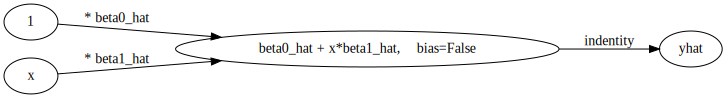

In [10]:
gv(''' 
    "1" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta0_hat"]
    "x" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta1_hat"]
    "beta0_hat + x*beta1_hat,    bias=False" -> "yhat"[label="indentity"]
    ''')

identity가 항등함수라는 뜻...(항등함수를 취한다.) 항등함수가 아니라 다른 함수로 만들어지는 경우도 있지.
- 여기는 biase가 false

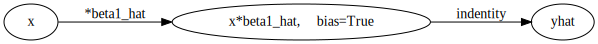

In [11]:
gv('''
"x" -> "x*beta1_hat,    bias=True"[label="*beta1_hat"] ;
"x*beta1_hat,    bias=True" -> "yhat"[label="indentity"] ''')


1은 항상 쓰는 거니까 생략해볼까.
- 이 표시를 위해 bias=True임
- 어떠한 상수를 맞춰줄 estimater가 필요하다는 말

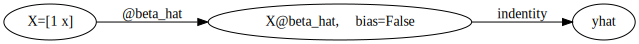

In [12]:
gv('''
"X=[1 x]" -> "X@beta_hat,    bias=False"[label="@beta_hat"] ;
"X@beta_hat,    bias=False" -> "yhat"[label="indentity"] ''')


beta_hat과 matrix곱해서.. X에 beta가 다 있어서 biase =False

이를 레이어라고 표현

#### 풀이1: 벡터버전, 사용자정의 손실함수 

`-` 포인트
```python
## 포인트코드1: 네트워크 생성 
net = tf.keras.Sequential()

## 포인트코드2: 네트워크의 아키텍처 설계 
net.add(tf.keras.layers.Dense(1,input_shape=(2,),use_bias=False)) 

## 포인트코드3: 네트워크 컴파일 = 아키텍처 + 손실함수 + 옵티마이저
net.compile(opt,loss=loss_fn2)

## 포인트코드4: 미분 & update 
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 
```

`-` 레이어: 입력 -> 레이어1 -> 출력/입력 -> 레이어2 -> ... 
- 이렇게 이어서 가능~

`-` 레이어: 입력 -> 레이어 -> 출력
- 일단 이거로 시작

`-` 네트워크: 레이어들의 집합
- 네트워크를 설계한다 ? -> 레이어를 설계한다.
- $x$를 입력으로 해서 $\hat{y}$를 설계한다 -> $\hat{y}$의 아키텍쳐를 설계한다.

In [615]:
net = tf.keras.Sequential()

In [616]:
net.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

오류뜨네

In [617]:
#collapse-output
net?

Signature:      net(*args, **kwargs)
Type:           Sequential
String form:    <keras.engine.sequential.Sequential object at 0x7f1b8b7ddf90>
File:           ~/anaconda3/envs/stbda2022/lib/python3.10/site-packages/keras/engine/sequential.py
Docstring:     
`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

`Sequential` provides training and inference features on this model.

Examples:

```python
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = 

In [618]:
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False))

- input을 dimension이 1인 튜플로 만들자
- y dimension은 1

In [619]:
net.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


잘 되네
- n * p에서 dimension은 p

```python
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False))
```
- units는 layer의 출력의 차원, 이 경우는 yhat의 차원, yhat은 (200,1)이므로 1이다.
- input_shape는 layer의 입력의 차원, 이 경우는 X의 차원, X(200,2)이므로 2이다.

**이 말은 즉슨 yhat을 구하는 방법 정의 = 아키텍쳐가 설계**

In [620]:
net.weights

[<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.8437647],
        [ 1.1076161]], dtype=float32)>]

내가 입력한 적 없는 숫자가 들어가 있음.
- net.weights @ X[0] 이 차원이 같아야 잘 yhat이 구해지겠지

In [621]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [622]:
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False)) 

In [623]:
def loss_fn2(y,yhat):
    return (y-yhat).T @ (y-yhat) / N

In [624]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

- 아키텍처 설계 + 소실함수 설계 + 옵티마이저 선택 -> 네트워크에 컴파일한다.

In [625]:
net.compile(opt,loss_fn2)

```python
# 아래와 같음
net.compile(opt,tf.losses.MSE)
```

`verbose` option; 결과를 보여줄 개수? 혹은 어떻게 보여줄지를 의미한다.

In [626]:
net.fit(X,y,epochs=1000,batch_size=N,verbose=0)

- 미분 + 파라미터 업데이트 = net.fit

`net.weight` 했더니 초기값이 나옴

In [311]:
net.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5836723],
        [3.9330251]], dtype=float32)>]

초기값 정하는 방법

In [628]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [629]:
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False)) 

In [630]:
def loss_fn2(y,yhat):
    return (y-yhat).T @ (y-yhat) / N

In [631]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [632]:
_w = net.get_weights()

---

In [635]:
type(_w)

list

In [636]:
#collapse-output
_w?

Type:        list
String form:
[array([[-1.053657 ],
       [ 1.3536845]], dtype=float32)]
Length:      1
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


길이가 1인 list네. 

In [637]:
_w[0]

array([[-1.053657 ],
       [ 1.3536845]], dtype=float32)

In [638]:
type(_w[0])

numpy.ndarray

`get_weight`는 numpy array를 list로 만든 것

---

In [639]:
[np.array([[-5.0],[10.0]],dtype=np.float32)]

[array([[-5.],
        [10.]], dtype=float32)]

초기값 설정하기 위해 

In [640]:
net.set_weights([np.array([[-5.0],[10.0]],dtype=np.float32)])

In [641]:
net.get_weights()

[array([[-5.],
        [10.]], dtype=float32)]

초기값 설정이 잘 되어있는 모습

In [642]:
net.compile(opt,tf.losses.MSE) # = net.compile(opt,loss_fn2) 결과 같음

In [643]:
net.fit(X,y,epochs=1000,batch_size=N,verbose=0)

- 미분 + 파라미터 업데이트 = net.fit

In [644]:
net.weights

[<tf.Variable 'dense_9/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.58366 ],
        [3.933048]], dtype=float32)>]

잘 학습된 모습

In [656]:
#collapse
y = y.reshape(200,1)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False))
opt = tf.keras.optimizers.SGD(0.1)
net.set_weights([np.array([[-5.0],[10.0]],dtype=np.float32)])
net.compile(opt,tf.losses.MSE)
net.fit(X,y,epochs=1000,batch_size=200, verbose=0)
net.weights

[<tf.Variable 'dense_19/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.58366 ],
        [3.933048]], dtype=float32)>]